In [ ]:
#Bilbiotecas
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt
from numpy import *

#Definimos el sistema de ecuaciones de VanDerPol
def vectorfield(X,t=0):
    x = X[0]
    y = X[1]
    dx = y
    dx_y = b*(1 - x**2)*dx - x
    return array([dx, dx_y])

#Otros parámetros
stoptime = 200
numpoints = 2500

#Valores del tiempo
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = -2.0
v0 = 0.0

#Amortiguamiento
b = 2.0

#Resolución del sistema
x, y = odeint(vectorfield,(x0,v0),t).T

with open('VanDerPol20.dat', 'w') as f:
    for t1, x1, y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=f)

In [ ]:
#Gráfica Número Uno (Fase y Ciclo Límite con Campo de Dirección)
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import pylab as p
%matplotlib inline

nb_points   = 20

x = linspace(-6, 6, nb_points)
y = linspace(-6, 6, nb_points)

J1 , G1  = meshgrid(x, y)                      
DJ1, DG1 = vectorfield([J1, G1])                
M = (hypot(DJ1, DG1))                           
M[ M == 0] = 1.                               
DJ1 /= M                                        
DG1 /= M

Q = p.quiver(J1, G1, DJ1, DG1, M, pivot='mid', cmap=p.cm.bone)

t1, x1, y1 = loadtxt('VanDerPol33.dat', unpack=True)
t2, x2, y2 = loadtxt('VanDerPol24.dat', unpack=True)
t3, x3, y3 = loadtxt('VanDerPol12.dat', unpack=True)
t4, x4, y4 = loadtxt('VanDerPol12+.dat', unpack=True)
t5, x5, y5 = loadtxt('VanDerPol20.dat', unpack=True, skiprows=535)

figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')

lw=1.5

plot(x1, y1, 'lime', linewidth=lw)
plot(x2, y2, 'lime', linewidth=lw)
plot(x3, y3, 'lime', linewidth=lw)
plot(x4, y4, 'lime', linewidth=lw)
plot(x5, y5, 'red', linewidth=lw)

plt.xlim(-6,6)
plt.ylim(-6,6)

title('Retrato de fase del oscilador de Van der Pol no forzado, \
que muestra un ciclo límite y el campo de dirección)'
savefig('Producto1.png', dpi=100)

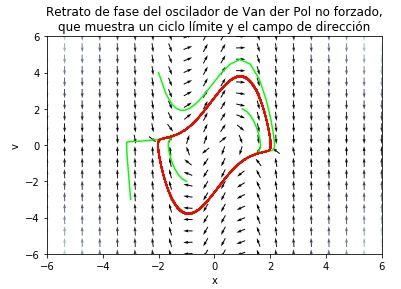

**Ejercicio 1:**

Resuelva la ecuación diferencial del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal. 

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]



In [ ]:
#Gráfica Número Dos (Evolución del Ciclo Límite)
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import pylab as p
%matplotlib inline

t0, x0, y0 = loadtxt('VDP0.dat', unpack=True, skiprows=1000)
t1, x1, y1 = loadtxt('VDP001.dat', unpack=True, skiprows=1000)
t2, x2, y2 = loadtxt('VDP01.dat', unpack=True, skiprows=1000)
t3, x3, y3 = loadtxt('VDP05.dat', unpack=True, skiprows=1000)
t4, x4, y4 = loadtxt('VDP1.dat', unpack=True, skiprows=1000)
t5, x5, y5 = loadtxt('VDP15.dat', unpack=True, skiprows=1000)
t6, x6, y6 = loadtxt('VDP2.dat', unpack=True, skiprows=1000)
t7, x7, y7 = loadtxt('VDP25.dat', unpack=True, skiprows=1000)
t8, x8, y8 = loadtxt('VDP3.dat', unpack=True, skiprows=1000)
t9, x9, y9 = loadtxt('VDP35.dat', unpack=True, skiprows=1000)
t10, x10, y10 = loadtxt('VDP4.dat', unpack=True, skiprows=1000)

figure(1, figsize=(4.82, 14.39))

xlabel('x')
ylabel('v')

lw=1

plot(x0, y0, 'aqua', linewidth=lw,label="μ = 0.0")
plot(x1, y1, 'coral', linewidth=lw,label="μ = 0.01")
plot(x2, y2, 'chartreuse', linewidth=lw,label="μ = 0.1")
plot(x3, y3, 'fuchsia', linewidth=lw,label="μ = 0.5")
plot(x4, y4, 'maroon', linewidth=lw,label="μ = 1.0")
plot(x5, y5, 'blue', linewidth=lw,label="μ = 1.5")
plot(x6, y6, 'lime', linewidth=lw,label="μ = 2.0")
plot(x7, y7, 'purple', linewidth=lw,label="μ = 2.5")
plot(x8, y8, 'cyan', linewidth=lw,label="μ = 3.0")
plot(x9, y9, 'orange', linewidth=lw,label="μ = 3.5")
plot(x10, y10, 'red', linewidth=lw,label="μ = 4.0")


grid(True)

plt.xlim(-2.5,2.5)
plt.ylim(-7,7)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

title('Evolución del ciclo límite en el plano de fase.'
      '\nEl ciclo límite comienza como círculo y, con'
      '\nvariación de μ, se vuelve cada vez más nítido.' 
      '\nUn ejemplo de un oscilador de relajación.')
savefig('Producto2.png', dpi=100)

**Ejercicio 2:**

Siguiendo con el ejemplo anterior del [oscilador de Van de Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator), reproduce la gráfica del [plano fase](https://en.wikipedia.org/wiki/Phase_plane) ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo. 

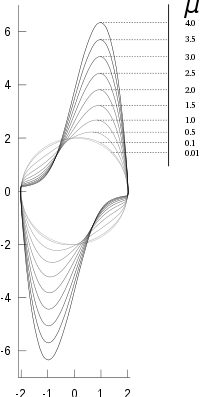

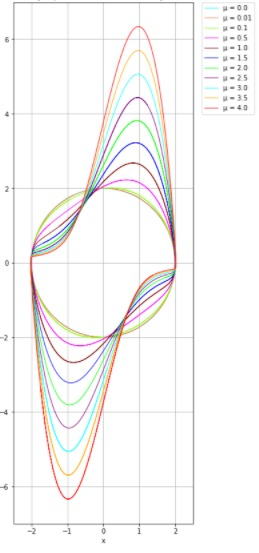

**Ejercicios 3:**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:


*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función *scipy.integrate.odeint* ó *scipy.integrate-solve_ivp*

**Ejercicio 3.1:** 

\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k>0.
\end{equation*}

**Ejercicio 3.2:**

\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}

**Ejercicio 3.3:**

\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}

Grafique las soluciones como funciones del tiempo. 


In [ ]:
#Bibliotecas
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt
from numpy import *

#Definimos el sistema de ecuaciones de VanDerPol
def vectorfield(X,t=0):
    x = X[0]
    y = X[1]
    dx = y
    dx_y = b*(1 - x**2)*dx - x
    return array([dx, dx_y])

#Otros parámetros
stoptime = 50
numpoints = 2500

#Valores del tiempo
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = 1.81
v0 = -0.55

#Amortiguamiento
b = 5.0

#Resolvemos el sistema de ecuaciones
x, y = odeint(vectorfield,(x0,v0),t).T

with open('VanDerPolb5.dat', 'w') as f:
    for t1, x1,y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=f)

In [ ]:
#Gráfica Número Tres (Oscilación de Van der Pol μ = 5)
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x, y = loadtxt('VanDerPolb5.dat', unpack=True)

figure(1, figsize=(15.59, 2.95))

xlabel('t')
ylabel('x')
lw = 2

plt.xlim(10,50)

plot(t, x, 'teal', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Oscilación de relajación en el oscilador Van'
      'Der Pol sin forzamiento externo. El parámetro'
      ' de amortiguación no lineal es igual a μ = 5.')
savefig('Producto3.png', dpi=100)

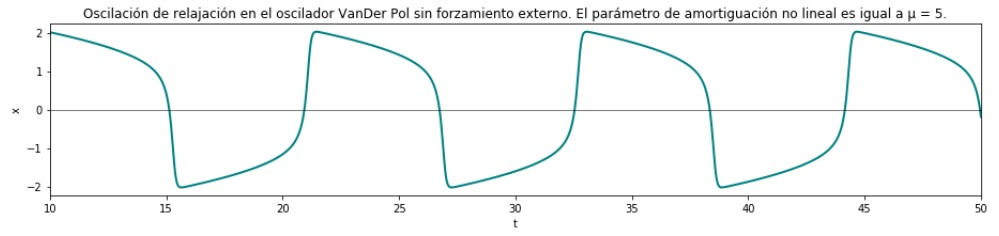

In [ ]:
#Bibliotecas
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt
import numpy as np 

#Definimos el sistema de ecuaciones de VanDerPol
def vectorfield(X,t=0):
    x = X[0]
    y = X[1]
    dx = y
    dx_y = b*(1 - x**2)*dx - x + A * np.sin(w*t)
    return array([dx, dx_y])

#Otros parámetros
stoptime = 600
numpoints = 2500

#Valores del tiempo
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = 0.0
v0 = 0.0

#Amortiguamiento
b = 8.53

#Amplitud
A = 1.2

#Velocidad angular
w = (2 * np.pi)/10

#Resolvemos el sistema de ecuaciones
x, y = odeint(vectorfield,(x0,v0),t).T

with open('VanDerPolForzado.dat', 'w') as f:
    for t1, x1,y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=f)

In [ ]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x, y = loadtxt('VanDerPolForzado.dat', unpack=True)

figure(1, figsize=(15.59, 2.94))

xlabel('t')
ylabel('x')
lw = 2

plt.xlim(300,600)

plot(t, x, 'crimson', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Comportamiento caótico en el oscilador Van Der Pol con '
      'forzamiento sinusoidal. El parámetro de amortiguación no'
      '\nlineal es igual a μ = 8.53, mientras que el forzamiento'
      'tiene una amplitud A = 1.2 y una frecuencia angular ω = 2π / 10.')
savefig('Producto4.png', dpi=100)

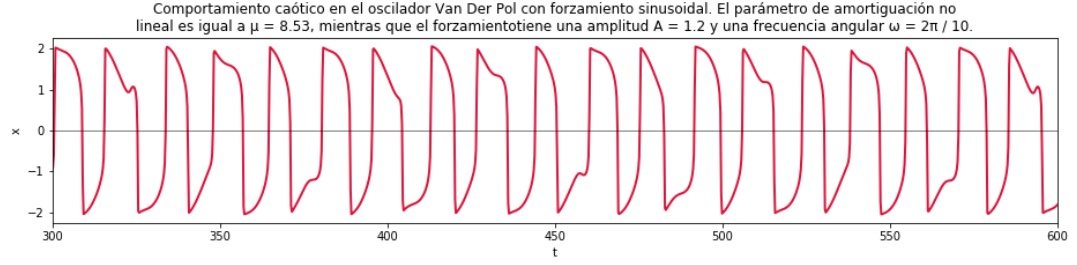

#PODEMOS DAR POR CONCLUIDA ESTA ACTIVIDAD
